In [4]:
import json

# Load the data from the file
file_path = '../data/raw/ms_marco_5k.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    data = file.readlines()

print('Data loaded successfully!')

# Pretty print the first line of the data

print('First line of the data:')
print(data[0])
print('Length of the data:')
print(len(data))
print('First 5 lines of the data:')
for i in range(5):
    print(data[i])

Data loaded successfully!
First line of the data:
{"answers": ["Results-Based Accountability is a disciplined way of thinking and taking action that communities can use to improve the lives of children, youth, families, adults and the community as a whole."], "passages": {"is_selected": [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], "passage_text": ["Since 2007, the RBA's outstanding reputation has been affected by the 'Securency' or NPA scandal. These RBA subsidiaries were involved in bribing overseas officials so that Australia might win lucrative note-printing contracts. The assets of the bank include the gold and foreign exchange reserves of Australia, which is estimated to have a net worth of A$101 billion. Nearly 94% of the RBA's employees work at its headquarters in Sydney, New South Wales and at the Business Resumption Site.", "The Reserve Bank of Australia (RBA) came into being on 14 January 1960 as Australia 's central bank and banknote issuing authority, when the Reserve Bank Act 1959 remo

In [5]:
from collections import defaultdict
import json

# Group lines by the number of passages
grouped_lines = defaultdict(list)

for line in data:
    parsed_line = json.loads(line)
    num_passages = len(parsed_line['passages']['passage_text'])
    grouped_lines[num_passages].append(parsed_line)

# Print the grouping result
for num_passages, lines in grouped_lines.items():
    print(f"Number of passages: {num_passages}, Number of lines: {len(lines)}")

# Plot the distribution of the number of passages


Number of passages: 10, Number of lines: 864
Number of passages: 7, Number of lines: 638
Number of passages: 9, Number of lines: 1682
Number of passages: 8, Number of lines: 1193
Number of passages: 6, Number of lines: 346
Number of passages: 4, Number of lines: 70
Number of passages: 5, Number of lines: 181
Number of passages: 3, Number of lines: 24
Number of passages: 2, Number of lines: 2


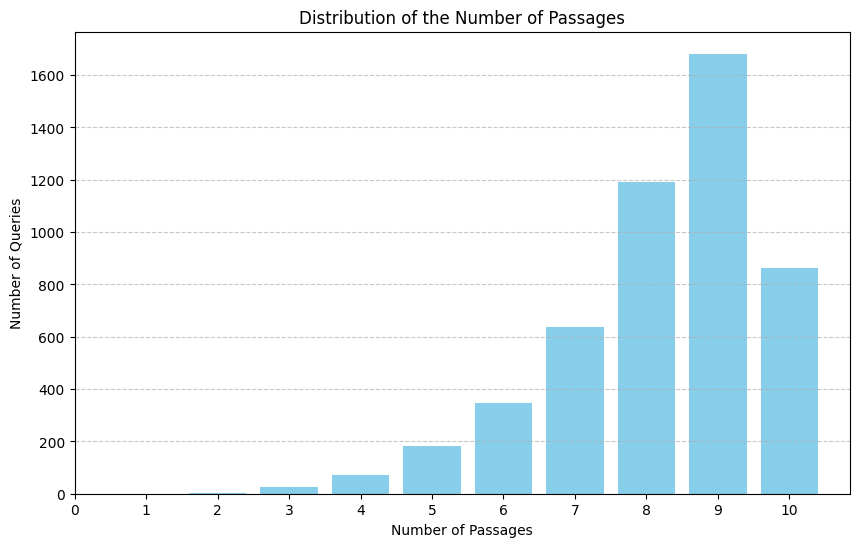

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Count the number of lines for each number of passages
num_passages_distribution = {num_passages: len(lines) for num_passages, lines in grouped_lines.items()}

# Sort the distribution by the number of passages
sorted_distribution = dict(sorted(num_passages_distribution.items()))

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(sorted_distribution.keys(), sorted_distribution.values(), color='skyblue')
plt.xlabel('Number of Passages')
plt.ylabel('Number of Queries')
plt.title('Distribution of the Number of Passages')
plt.xticks(np.arange(0, max(sorted_distribution.keys()) + 1, step=1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()